<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#전처리" data-toc-modified-id="전처리-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>전처리</a></span></li><li><span><a href="#임베딩" data-toc-modified-id="임베딩-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>임베딩</a></span></li><li><span><a href="#군집분석" data-toc-modified-id="군집분석-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>군집분석</a></span><ul class="toc-item"><li><span><a href="#Join" data-toc-modified-id="Join-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Join</a></span></li><li><span><a href="#K-정하기" data-toc-modified-id="K-정하기-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>K 정하기</a></span></li><li><span><a href="#K-=-5-!!" data-toc-modified-id="K-=-5-!!-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>K = 5 !!</a></span></li></ul></li><li><span><a href="#군집별-결과" data-toc-modified-id="군집별-결과-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>군집별 결과</a></span><ul class="toc-item"><li><span><a href="#Cluster-1" data-toc-modified-id="Cluster-1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Cluster 1</a></span></li><li><span><a href="#Cluster-2" data-toc-modified-id="Cluster-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cluster 2</a></span></li><li><span><a href="#Cluster-3" data-toc-modified-id="Cluster-3-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Cluster 3</a></span></li><li><span><a href="#Cluster-4" data-toc-modified-id="Cluster-4-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Cluster 4</a></span></li><li><span><a href="#Cluster-5" data-toc-modified-id="Cluster-5-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Cluster 5</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
from chatspace import ChatSpace
from gensim.models import FastText
from konlpy.tag import Kkma

import re
import json
import os 
os.listdir('../dataset')

import sys
sys.path.append('../code')

In [2]:
from preprocessing import GlowpickPreprocessing

# 데이터 불러오기

In [3]:
reviews = pd.read_csv('../dataset/glowpick_reviews.csv')
print('reviews shape: ',reviews.shape)

reviews shape:  (5208, 7)


# 전처리

In [4]:
GP = GlowpickPreprocessing()
texts = GP.fit(reviews.content.tolist())

[Log]: complete stopword
Loading JIT Compiled ChatSpace Model
[Log]: complete spacefix


In [8]:
texts[0]

['제일', '무난하고', '가볍게', '쓰기', '좋아서', '몇', '년째', '이거만', '써요']

# 임베딩

In [9]:
model = FastText(size=100, window=5, min_count=5, sentences=texts)

In [11]:
model.wv.most_similar('선물')

[('선물로도', 0.9998528957366943),
 ('생일선물로', 0.9997512102127075),
 ('물로', 0.9996272921562195),
 ('선물해줬는데', 0.9993361234664917),
 ('생신', 0.999152660369873),
 ('아빠', 0.9991397857666016),
 ('해드렸는데', 0.9989299774169922),
 ('친구', 0.9989151954650879),
 ('드렸는데', 0.9987900257110596),
 ('사다줬는데', 0.9987854957580566)]

In [62]:
model.wv.most_similar('선물')

[('선물로도', 0.9998816251754761),
 ('생일선물로', 0.9996999502182007),
 ('물로', 0.9994733333587646),
 ('선물해줬는데', 0.9994546175003052),
 ('해드렸는데', 0.999070405960083),
 ('사다줬는데', 0.9990596175193787),
 ('아빠', 0.9989449381828308),
 ('생신', 0.9989318251609802),
 ('친구', 0.9989303350448608),
 ('사드렸는데', 0.9987760186195374)]

In [34]:
model.wv.most_similar('아빠')

[('생일선물로', 0.9993594884872437),
 ('물로', 0.9992992877960205),
 ('해드렸는데', 0.9992928504943848),
 ('선물해줬는데', 0.9991929531097412),
 ('남자친구가', 0.9991881847381592),
 ('남자친구한테', 0.9991691708564758),
 ('사다줬는데', 0.9991145133972168),
 ('드렸는데', 0.9990746974945068),
 ('친구', 0.9990213513374329),
 ('사드렸는데', 0.9989744424819946)]

In [13]:
model.wv.most_similar('촉촉')

[('촉촉해', 0.9999401569366455),
 ('촉촉히', 0.9998993873596191),
 ('촉촉하면서', 0.9998915195465088),
 ('촉촉하다는', 0.999889612197876),
 ('촉촉한데', 0.9998733997344971),
 ('촉촉함도', 0.9998700618743896),
 ('촉촉함과', 0.9998592734336853),
 ('흡수도', 0.9998571276664734),
 ('촉촉함은', 0.9998496174812317),
 ('촉촉해진', 0.9998490810394287)]

In [14]:
model.wv.most_similar('가성비')

[('남성분들에게는', 0.9999215602874756),
 ('남성분들', 0.9999051690101624),
 ('남성분들도', 0.9999027848243713),
 ('남성분들은', 0.9998997449874878),
 ('남성분들에게', 0.9998933672904968),
 ('남성분들께', 0.9998932480812073),
 ('남성분들을', 0.9998815059661865),
 ('여름', 0.9998617768287659),
 ('가성비는', 0.9998448491096497),
 ('분들에게는', 0.9998434782028198)]

# 군집분석

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import seaborn as sns
from pyecharts import Scatter3D

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
sent_vec = np.zeros((len(splitted_texts), 100))
for i in range(len(splitted_texts)):
    sent_vec[i] = model.wv[splitted_texts[i]].sum(axis=0)

In [85]:
from scipy.spatial.distance import cosine

In [89]:
cosine(sent_vec[0], sent_vec[3])

0.003672425017461123

In [84]:
sent_vec[[0]]

array([[ 3.0932734 , -2.35114551,  5.83721781,  3.78103638, -0.24044189,
         6.41274166,  0.38254464, -5.6516161 , -0.97839987,  0.83765602,
         4.7432766 ,  4.23942232,  2.29898214,  1.15867245, -1.49782109,
        -0.01660961, -0.85812944,  0.34296197, -0.34782276,  2.7061801 ,
         1.20345569, -1.91706407, -0.42440024, -3.02400875, -4.1600275 ,
         0.02995355, -0.06352422, -0.53641456,  2.67076731, -5.2866478 ,
        -3.3990798 , -1.73929787,  3.47195411, -0.73819357,  5.26400185,
        -2.23734927,  5.32659388, -5.3778758 ,  2.70992494,  1.56451511,
        -2.98991442, -4.14373541, -1.28319538,  3.73295021, -2.28126192,
         0.2901479 , -0.3495484 ,  0.07504109,  1.67604482,  2.33400154,
        -5.98371744,  5.68504095, -0.12401706, -0.01206111,  0.1294015 ,
        -7.2796936 ,  2.49614978, -1.61590707,  2.19255924,  0.22357562,
         0.68493223, -4.72330379, -2.40460348, -1.74064791,  1.55773795,
        -1.05685127, -1.48446643,  1.70602369, -3.1

In [17]:
scale_vec = scaler.fit_transform(sent_vec.T)
scale_vec = scale_vec.T

## Join

In [173]:
reviews.rate.unique()
rate_dict = {
    'best':4,
    'good':3,
    'soso':2,
    'bad':1,
    'worst':0
}
reviews['rate_n'] = reviews.rate.map(rate_dict)

In [181]:
product_df = pd.read_csv('../dataset/glowpick_products.csv')
product_cat_df = product_df[['product_url','category']]

In [188]:
scale_vec_df = pd.DataFrame(scale_vec)
scale_vec_df.columns = [f'e{i}' for i in range(100)]

In [206]:
review_scale_df = pd.concat([reviews, scale_vec_df], axis=1)
review_cat_df = pd.merge(review_scale_df, product_cat_df, on='product_url', how='left')

In [207]:
cluster_df = pd.get_dummies(review_cat_df.iloc[:,9:])

## K 정하기

In [208]:
inertia_lst = []
for i in range(1,10):
    km = KMeans(n_clusters=i, max_iter=300, random_state=223)
    km.fit(cluster_df)
    inertia_lst.append(km.inertia_)

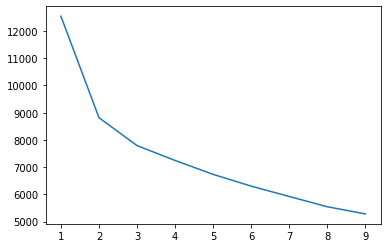

In [209]:
plt.plot(range(1,10), inertia_lst)

## K = 5 !!

In [210]:
km = KMeans(n_clusters=5, max_iter=300, random_state=223)
km.fit(cluster_df)
labels = km.predict(cluster_df)

In [212]:
embedding_df = cluster_df.copy()
embedding_df['labels'] = review_cat_df.labels

군집을 4개로 했을때 크게 세가지로 묶이길래 5개로 묶어보니 크게 4개로 묶여서 이렇게함

In [213]:
embedding_df.labels.value_counts()

1    2903
0    1466
2    1071
4     360
3       1
Name: labels, dtype: int64

In [214]:
tsne1 = TSNE(n_components=2)
tsne_result1 = tsne1.fit_transform(embedding_df.iloc[:,:-1].values)

tsne_df1 = pd.DataFrame(tsne_result1)
tsne_df1['labels'] = labels
tsne_df1['labels'] = tsne_df1.labels.astype(str)
tsne_df1.columns = ['t1','t2','labels']

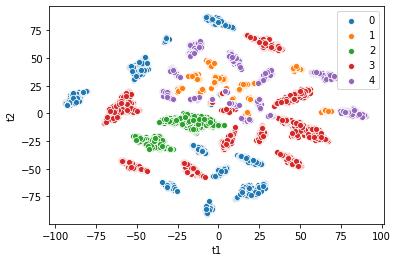

In [215]:
for i in range(5):
    sns.scatterplot(x='t1',y='t2',data=tsne_df1[tsne_df1.labels==str(i)], label=i)
plt.legend()

In [217]:
tsne2 = TSNE(n_components=3)
tsne_result2 = tsne2.fit_transform(embedding_df.iloc[:,:-1].values)

tsne_df2 = pd.DataFrame(tsne_result2)
tsne_df2['labels'] = labels
tsne_df2['labels'] = tsne_df2.labels.astype(str)
tsne_df2.columns = ['t2','t2','t3','labels']

In [218]:
scatter3D = Scatter3D(width=1200, height=700)
for i in range(5):
    temp = tsne_df2[tsne_df2.labels==str(i)].iloc[:,:-1].values
    scatter3D.add(f'class {i}',temp)

In [219]:
scatter3D

# 군집별 결과

In [ ]:
kkma = Kkma()

temp = reviews.pre_content.apply(lambda x: ' '.join(kkma.nouns(x)))

temp_df = pd.DataFrame(temp)
temp_df['labels'] = labels
temp_df.head()

## Cluster 1

In [ ]:
label_0 = temp_df[temp_df.labels==0].pre_content.tolist()
label_0 = pd.Series(' '.join(label_0).split(' '))
label_0_df = pd.DataFrame(label_0, columns=['word'])
label_0_df['cnt'] = label_0.apply(lambda x: len(x))

label_0_df[label_0_df.cnt > 1].word.value_counts()[:30]

## Cluster 2

In [ ]:
label_1 = temp_df[temp_df.labels==1].pre_content.tolist()
label_1 = pd.Series(' '.join(label_1).split(' '))
label_1_df = pd.DataFrame(label_1, columns=['word'])
label_1_df['cnt'] = label_1.apply(lambda x: len(x))

label_1_df[label_1_df.cnt > 1].word.value_counts()[:30]

## Cluster 3

In [ ]:
label_2 = temp_df[temp_df.labels==2].pre_content.tolist()
label_2 = pd.Series(' '.join(label_2).split(' '))
label_2_df = pd.DataFrame(label_2, columns=['word'])
label_2_df['cnt'] = label_2.apply(lambda x: len(x))

label_2_df[label_2_df.cnt > 1].word.value_counts()[:30]

## Cluster 4

In [ ]:
label_3 = temp_df[temp_df.labels==3].pre_content.tolist()
label_3 = pd.Series(' '.join(label_3).split(' '))
label_3_df = pd.DataFrame(label_3, columns=['word'])
label_3_df['cnt'] = label_3.apply(lambda x: len(x))

label_3_df[label_3_df.cnt > 1].word.value_counts()[:30]

## Cluster 5

In [ ]:
label_4 = temp_df[temp_df.labels==4].pre_content.tolist()
label_4 = pd.Series(' '.join(label_4).split(' '))
label_4_df = pd.DataFrame(label_4, columns=['word'])
label_4_df['cnt'] = label_4.apply(lambda x: len(x))

label_4_df[label_4_df.cnt > 1].word.value_counts()[:30]